In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

class AcademicColors:
    """
    学术严谨风格配色方案
    基于Nature、Science等顶级科学期刊的设计理念
    """

    def __init__(self):
        # 主色板
        self.primary = '#333333'
        self.secondary = '#000000'
        self.background = '#F0F0F0'
        self.gridline = '#D9D9D9'

        # 分类色板（图表专用）
        self.categorical = [
            '#FF8C00',  # 明亮橙色 (保留)
            '#6A7FDB',  # 明亮靛蓝 (保留)
            '#2E8B7A',  # 深青 (保留)
            '#A0522D',  # 深红棕色 (替换金色)
            '#DA70D6',  # 明亮兰花紫 (保留)
            '#87CEEB',  # 天蓝色 (保留)
        ]

        # 发散色板
        self.diverging = [
            '#053061',  # 深蓝
            '#67A9CF',  # 浅蓝
            '#F7F7F7',  # 中性灰
            '#EF8A62',  # 浅红
            '#B2182B'   # 深红
        ]

        # 创建颜色映射
        self.categorical_cmap = ListedColormap(self.categorical)
        self.diverging_cmap = ListedColormap(self.diverging)

    def set_style(self):
        """设置matplotlib和seaborn的学术风格"""
        # 设置seaborn样式
        sns.set_style("whitegrid", {
            "axes.linewidth": 0.8,
            "grid.linewidth": 0.5,
            "grid.color": self.gridline,
            "axes.edgecolor": self.secondary,
            "axes.spines.left": True,
            "axes.spines.bottom": True,
            "axes.spines.top": False,
            "axes.spines.right": False,
        })

        # 设置matplotlib参数
        plt.rcParams.update({
            'font.size': 10,
            'axes.titlesize': 12,
            'axes.labelsize': 10,
            'xtick.labelsize': 9,
            'ytick.labelsize': 9,
            'legend.fontsize': 9,
            'figure.titlesize': 14,
            'axes.titlecolor': self.secondary,
            'axes.labelcolor': self.primary,
            'text.color': self.primary,
            'axes.edgecolor': self.secondary,
            'xtick.color': self.primary,
            'ytick.color': self.primary,
            'grid.alpha': 0.6,
            'axes.axisbelow': True
        })

        # 设置默认调色板
        sns.set_palette(self.categorical)

    def get_colors(self, n=None, palette_type='categorical'):
        """
        获取指定数量的颜色

        Parameters:
        -----------
        n : int, optional
            需要的颜色数量，如果为None则返回完整调色板
        palette_type : str
            调色板类型，'categorical' 或 'diverging'

        Returns:
        --------
        list : 颜色列表
        """
        if palette_type == 'categorical':
            colors = self.categorical
        elif palette_type == 'diverging':
            colors = self.diverging
        else:
            raise ValueError("palette_type must be 'categorical' or 'diverging'")

        if n is None:
            return colors
        elif n <= len(colors):
            return colors[:n]
        else:
            # 如果需要的颜色数量超过调色板，则循环使用
            return (colors * ((n // len(colors)) + 1))[:n]

    def _draw_palette_on_ax(self, colors, ax, title):
        """
        在指定的轴上绘制调色板
        这是palplot的替代方案，因为palplot不支持ax参数
        """
        n_colors = len(colors)
        ax.imshow(np.arange(n_colors).reshape(1, n_colors),
                  cmap=ListedColormap(colors),
                  interpolation="nearest",
                  aspect="auto")

        # 设置刻度和标签
        ax.set_xticks(np.arange(n_colors))
        ax.set_xticklabels([f'{i+1}' for i in range(n_colors)])
        ax.set_yticks([])
        ax.set_title(title, fontsize=12, color=self.secondary, pad=15)

        # 添加颜色值标签
        for i, color in enumerate(colors):
            ax.text(i, 0, color.upper(),
                   ha='center', va='center',
                   fontsize=8, color='white' if self._is_dark_color(color) else 'black',
                   weight='bold')

    def _is_dark_color(self, hex_color):
        """判断颜色是否为深色"""
        # 移除#号并转换为RGB
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        # 计算亮度
        brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
        return brightness < 128

    def show_palette(self, palette_type='all'):
        """
        展示调色板

        Parameters:
        -----------
        palette_type : str
            'categorical', 'diverging', 或 'all'
        """
        if palette_type == 'all':
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
            self._draw_palette_on_ax(self.categorical, ax1, '分类色板（Categorical Palette）')
            self._draw_palette_on_ax(self.diverging, ax2, '发散色板（Diverging Palette）')
        elif palette_type == 'categorical':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.categorical, ax, '分类色板（Categorical Palette）')
        elif palette_type == 'diverging':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.diverging, ax, '发散色板（Diverging Palette）')
        else:
            raise ValueError("palette_type must be 'categorical', 'diverging', or 'all'")

        plt.tight_layout()
        plt.show()

    def show_simple_palette(self, palette_type='all'):
        """
        使用seaborn的palplot展示调色板（简单版本，不支持自定义轴）
        """
        if palette_type in ['categorical', 'all']:
            print("分类色板（Categorical Palette）:")
            sns.palplot(self.categorical)
            plt.show()

        if palette_type in ['diverging', 'all']:
            print("发散色板（Diverging Palette）:")
            sns.palplot(self.diverging)
            plt.show()

    def demo_plots(self):
        """展示使用示例"""
        # 创建示例数据
        np.random.seed(42)
        categories = ['组别A', '组别B', '组别C', '组别D', '组别E']
        values = np.random.randint(10, 100, len(categories))

        # 创建子图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle('学术严谨风格图表示例', fontsize=16, color=self.secondary, y=0.95)

        # 柱状图
        bars = ax1.bar(categories, values, color=self.get_colors(len(categories)))
        ax1.set_title('实验组数据对比', fontweight='bold')
        ax1.set_ylabel('测量值')
        ax1.grid(True, alpha=0.3)

        # 散点图
        x = np.random.normal(0, 1, 100)
        y = np.random.normal(0, 1, 100)
        groups = np.random.choice(categories[:3], 100)

        for i, group in enumerate(categories[:3]):
            mask = groups == group
            ax2.scatter(x[mask], y[mask],
                       color=self.categorical[i],
                       label=group, alpha=0.7, s=50)

        ax2.set_title('多组数据分布', fontweight='bold')
        ax2.set_xlabel('变量 X')
        ax2.set_ylabel('变量 Y')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 热力图数据
        data = np.random.randn(5, 5)
        im = ax3.imshow(data, cmap=self.diverging_cmap, aspect='auto')
        ax3.set_title('相关性矩阵热力图', fontweight='bold')
        ax3.set_xticks(range(5))
        ax3.set_yticks(range(5))
        ax3.set_xticklabels([f'特征{i+1}' for i in range(5)])
        ax3.set_yticklabels([f'特征{i+1}' for i in range(5)])

        # 添加颜色条
        cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
        cbar.set_label('相关系数')

        # 线图
        x_line = np.linspace(0, 10, 50)
        for i in range(3):
            y_line = np.sin(x_line + i) + np.random.normal(0, 0.1, 50)
            ax4.plot(x_line, y_line,
                    color=self.categorical[i],
                    label=f'条件{i+1}',
                    linewidth=2)

        ax4.set_title('时间序列对比', fontweight='bold')
        ax4.set_xlabel('时间')
        ax4.set_ylabel('响应值')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# 创建全局颜色实例
academic_colors = AcademicColors()

# 便捷函数
def set_academic_style():
    """快速设置学术风格"""
    academic_colors.set_style()

def get_academic_colors(n=None, palette_type='categorical'):
    """快速获取学术配色"""
    return academic_colors.get_colors(n, palette_type)

def show_academic_palette(palette_type='all'):
    """快速展示调色板（修复版本）"""
    academic_colors.show_palette(palette_type)

def show_simple_palette(palette_type='all'):
    """使用seaborn原生palplot展示调色板"""
    academic_colors.show_simple_palette(palette_type)

# 使用示例
if __name__ == "__main__":
    print("学术严谨风格配色方案已加载！")
    print("\n使用方法：")
    print("1. set_academic_style() - 设置学术风格")
    print("2. get_academic_colors(n, 'categorical') - 获取分类颜色")
    print("3. get_academic_colors(n, 'diverging') - 获取发散颜色")
    print("4. show_academic_palette() - 展示所有调色板（修复版本）")
    print("5. show_simple_palette() - 展示调色板（简单版本）")
    print("6. academic_colors.demo_plots() - 查看使用示例")


学术严谨风格配色方案已加载！

使用方法：
1. set_academic_style() - 设置学术风格
2. get_academic_colors(n, 'categorical') - 获取分类颜色
3. get_academic_colors(n, 'diverging') - 获取发散颜色
4. show_academic_palette() - 展示所有调色板（修复版本）
5. show_simple_palette() - 展示调色板（简单版本）
6. academic_colors.demo_plots() - 查看使用示例


分类色板（Categorical Palette）:


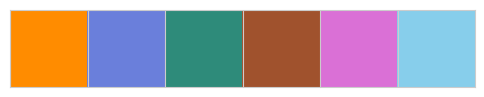

发散色板（Diverging Palette）:


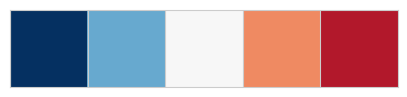

In [4]:
show_simple_palette()

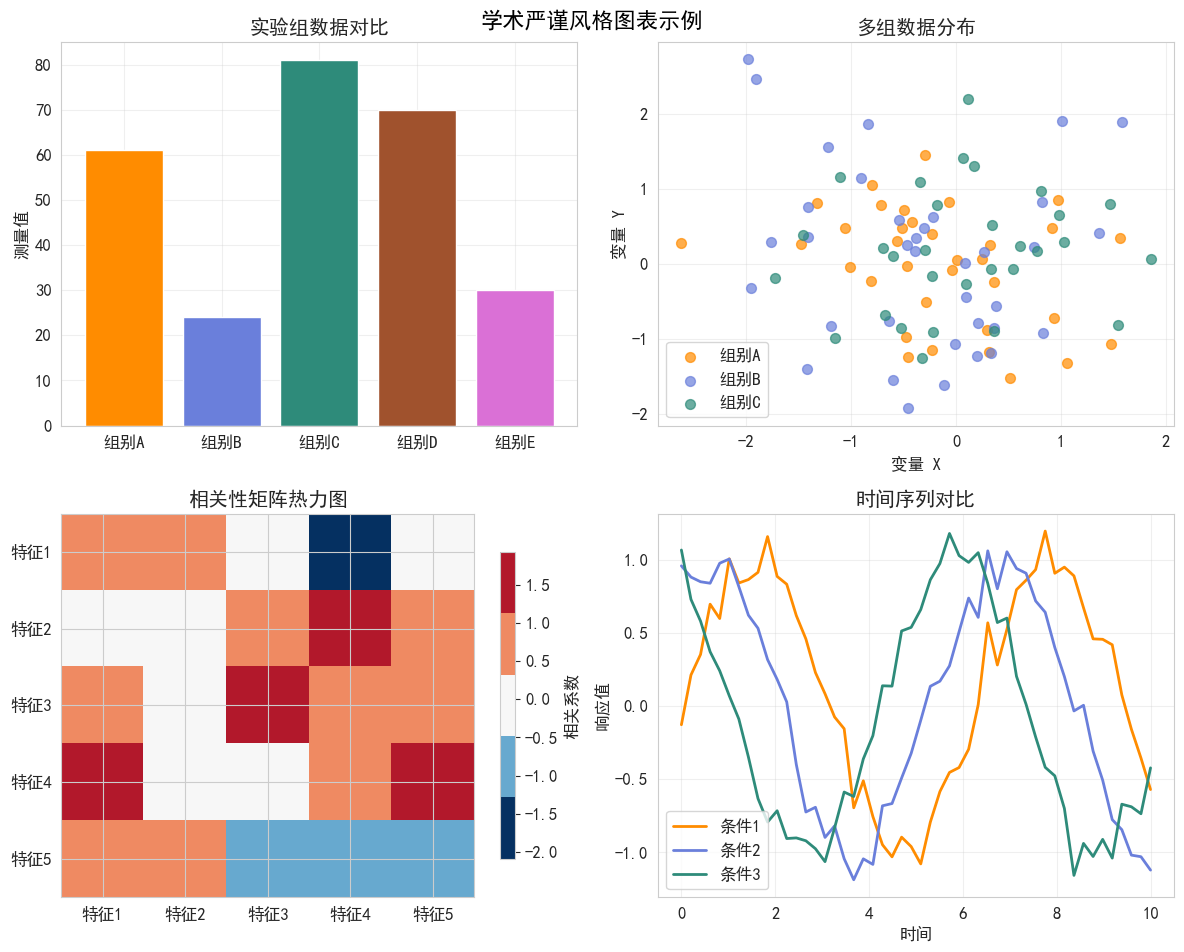

In [5]:
academic_colors.demo_plots()

In [2]:
#从数据库导入数据dfpbroech1
# import os
# os.environ["MODIN_ENGINE"] = "ray"
# os.environ["MODIN_CPUS"] = "16"
# import modin.pandas as pd
import pandas as pd
from sqlalchemy import create_engine

# 根据你的实际数据库信息填写
username = "panjinhe"
password = "20020112p"
host = "localhost"
port = "5432"
database = "pbroe"

# 构建连接字符串
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

# 创建引擎
engine = create_engine(connection_string)

# 读取pbroe.pbroech11表
dfpbroech1 = pd.read_sql_table('pbroech11', engine, schema='pbroe')

print(dfpbroech1.info())

dfpbroech1.rename(columns={
    'f050504c': 'ROEttm',
    'f100401a': 'PB',
    'f100603c': 'PEttm',
    'msmvosd': '流通市值',
    'msmvttl': '总市值',
    'markettype': '市场类型'
}, inplace=True)

print(dfpbroech1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260099 entries, 0 to 260098
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   stkcd       260099 non-null  object        
 1   shortname   260099 non-null  object        
 2   ifst        260099 non-null  int64         
 3   accper      260099 non-null  datetime64[ns]
 4   indcd1      260099 non-null  object        
 5   indnme1     260099 non-null  object        
 6   f050504c    246158 non-null  float64       
 7   f100401a    257426 non-null  float64       
 8   f100603c    208713 non-null  float64       
 9   markettype  259767 non-null  object        
 10  msmvosd     259789 non-null  float64       
 11  msmvttl     259789 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 23.8+ MB
None
    stkcd shortname  ifst     accper indcd1 indnme1    ROEttm         PB  \
0  000001      深发展A     0 1991-12-31    

In [3]:
#添加lnPB列
import numpy as np
# 删除 PB <= 0 的样本
dfpbroech1 = dfpbroech1[dfpbroech1['PB'] > 0].copy()
# 计算 PB 的自然对数
dfpbroech1['lnPB'] = np.log(dfpbroech1['PB'])
# 查看结果
print("添加 lnPB 列后的数据（已删除 PB <= 0 的样本）:")
print(dfpbroech1[['stkcd', 'accper', 'ROEttm', 'PB', 'lnPB']].head(10))

添加 lnPB 列后的数据（已删除 PB <= 0 的样本）:
    stkcd     accper    ROEttm         PB      lnPB
0  000001 1991-12-31       NaN   4.581558  1.522039
1  000001 1992-12-31       NaN  10.994626  2.397407
2  000001 1993-12-31  0.315094   5.063778  1.622113
3  000001 1994-06-30       NaN   2.393537  0.872772
4  000001 1994-12-31  0.250146   2.721719  1.001264
5  000001 1995-06-30       NaN   2.115744  0.749407
6  000001 1995-12-31  0.240340   2.544805  0.934054
7  000001 1996-06-30  0.277916   6.812861  1.918812
8  000001 1996-12-31  0.349894   6.729573  1.906512
9  000001 1997-06-30  0.326650  13.091333  2.571950


In [6]:
#散点图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

def create_pb_roe_scatter(df, date, title_suffix=""):
    """
    创建PB-ROE散点图的函数（支持中文显示）
    """
    # 筛选指定日期的数据
    df_filtered = df[df['accper'] == date].copy()

    # 移除缺失值和异常值
    df_clean = df_filtered.dropna(subset=['ROEttm', 'lnPB'])

    # 过滤极端值
    df_clean = df_clean[
        (df_clean['ROEttm'] > -0.5) & (df_clean['ROEttm'] < 0.8) &
        (df_clean['lnPB'] > -2) & (df_clean['lnPB'] < 4)
    ]

    if len(df_clean) == 0:
        print(f"警告：{date} 没有有效数据")
        return None

    # 创建图表
    plt.figure(figsize=(12, 8))

    # 绘制散点图
    scatter = plt.scatter(df_clean['ROEttm'], df_clean['lnPB'],
                         alpha=0.6, s=30, c=get_academic_colors(1)[0],
                         edgecolors='white', linewidth=0.5)

    # 计算并绘制趋势线
    if len(df_clean) > 10:
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            df_clean['ROEttm'], df_clean['lnPB'])

        x_trend = np.linspace(df_clean['ROEttm'].min(), df_clean['ROEttm'].max(), 100)
        y_trend = slope * x_trend + intercept

        # 趋势线标签
        trend_label = f'趋势线 ($R^2={r_value**2:.3f}$)'
        plt.plot(x_trend, y_trend, color=get_academic_colors(2)[1], linewidth=2, alpha=0.8, label=trend_label)

        # 统计信息
        stats_text = f'样本数量: {len(df_clean)}\n斜率: {slope:.2f}\n$R^2$: {r_value**2:.3f}'
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # 格式化日期显示（只显示日期部分）
    date_str = pd.to_datetime(date).strftime('%Y-%m-%d')

    # 设置图表标题和标签
    plt.title(f'ln(PB)-ROE关系散点图 ({date_str}){title_suffix}',
             fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('净资产收益率 ROE (TTM)', fontsize=14)
    plt.ylabel('ln(市净率) ln(P/B)', fontsize=14)

    # 添加网格和图例
    plt.grid(True, alpha=0.3)
    if len(df_clean) > 10:
        plt.legend(fontsize=12)

    # 设置坐标轴范围
    plt.xlim(df_clean['ROEttm'].min() - 0.02, df_clean['ROEttm'].max() + 0.02)
    plt.ylim(df_clean['lnPB'].min() - 0.1, df_clean['lnPB'].max() + 0.1)

    # 添加理论解释文本
    theory_text = "理论关系:  ln(P/B) = (r-k)T\n高 ROE 应对应高 ln(P/B)"
    plt.text(0.98, 0.02, theory_text, transform=plt.gca().transAxes,
            horizontalalignment='right', verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    plt.tight_layout()
    return plt.gcf()


数据中可用的日期范围:
最早日期: 1990-12-31 00:00:00
最晚日期: 2025-03-31 00:00:00
总共有 114 个不同的日期
使用最接近的日期: 2024-12-31 00:00:00
筛选前样本数: 5081
筛选后样本数: 4411
图片已保存至: ch1pic\pb_roe_scatter_2024_12_31.png


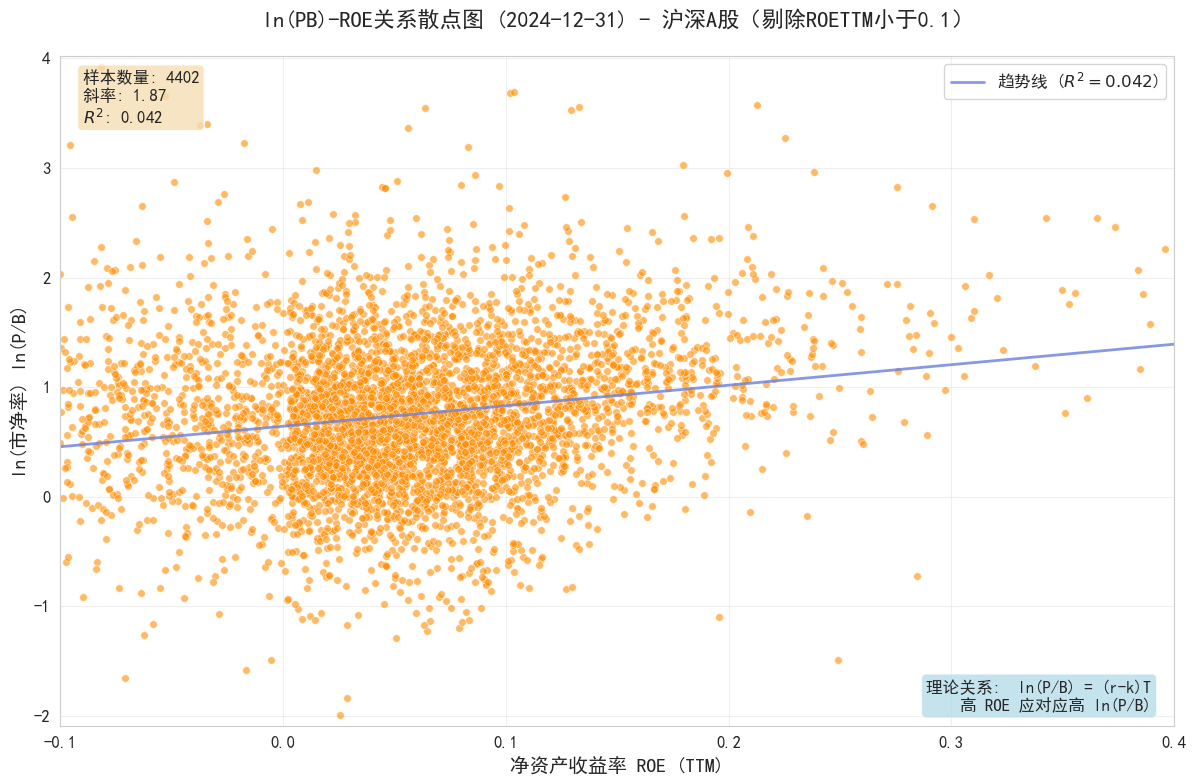

使用最接近的日期: 2017-12-31 00:00:00
筛选前样本数: 3319
筛选后样本数: 3196
图片已保存至: ch1pic\pb_roe_scatter_2017_12_31.png


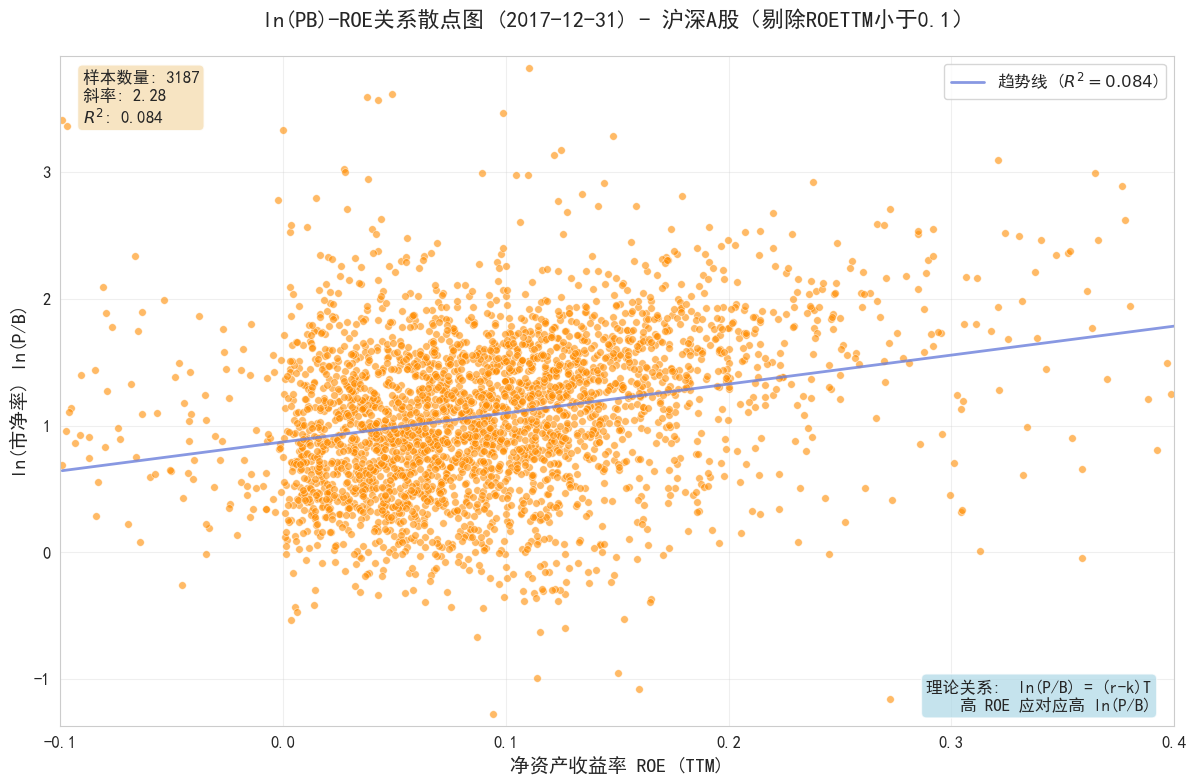

In [7]:
#创建散点图
import os

# 创建保存图片的文件夹
save_dir = 'ch1pic'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 创建散点图
target_dates = ['2024-12-31',  '2017-12-31']
date_descriptions = {
    '2024-12-31': ' - 沪深A股（剔除ROETTM小于0.1）',
    '2017-12-31': ' - 沪深A股（剔除ROETTM小于0.1）'
}

# 检查数据中实际可用的日期
print("数据中可用的日期范围:")
print(f"最早日期: {dfpbroech1['accper'].min()}")
print(f"最晚日期: {dfpbroech1['accper'].max()}")
print(f"总共有 {dfpbroech1['accper'].nunique()} 个不同的日期")

# 为每个目标日期创建散点图
for date in target_dates:
    # 直接匹配确切日期
    if date in dfpbroech1['accper'].values:
        print(f"\n正在生成 {date} 的散点图...")
        # 筛选ROE大于-0.1%的样本
        df_filtered = dfpbroech1[(dfpbroech1['accper'] == date) & (dfpbroech1['ROEttm'] > -0.1)]
        print(f"筛选前样本数: {len(dfpbroech1[dfpbroech1['accper'] == date])}")
        print(f"筛选后样本数: {len(df_filtered)}")

        fig = create_pb_roe_scatter(df_filtered, date, date_descriptions.get(date, ''))
        if fig:
            plt.xlim(-0.1, 0.4)  # 设置横坐标范围
            # 保存图片
            filename = f"pb_roe_scatter_{date.replace('-', '_')}.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"图片已保存至: {filepath}")
            plt.show()
    else:
        available_dates = dfpbroech1['accper'].unique()
        closest_date = min(available_dates, key=lambda x: abs(pd.to_datetime(x) - pd.to_datetime(date)))
        print(f"使用最接近的日期: {closest_date}")
        # 筛选ROE大于-0.1%的样本
        df_filtered = dfpbroech1[(dfpbroech1['accper'] == closest_date) & (dfpbroech1['ROEttm'] > -0.1)]
        print(f"筛选前样本数: {len(dfpbroech1[dfpbroech1['accper'] == closest_date])}")
        print(f"筛选后样本数: {len(df_filtered)}")

        fig = create_pb_roe_scatter(df_filtered, closest_date, date_descriptions.get(date, ''))
        if fig:
            plt.xlim(-0.1, 0.4)  # 设置横坐标范围
            # 保存图片
            date_str = pd.to_datetime(closest_date).strftime('%Y_%m_%d')
            filename = f"pb_roe_scatter_{date_str}.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"图片已保存至: {filepath}")
            plt.show()


2023-2024: 相关系数 = 0.7116, 有效样本 = 4143, 过滤样本 = 842
2022-2023: 相关系数 = 0.6314, 有效样本 = 4008, 过滤样本 = 799
2021-2022: 相关系数 = 0.6372, 有效样本 = 3770, 过滤样本 = 714
2020-2021: 相关系数 = 0.5655, 有效样本 = 3415, 过滤样本 = 633
图片已成功保存至: ch1pic\ROE年度相关性分析图.png


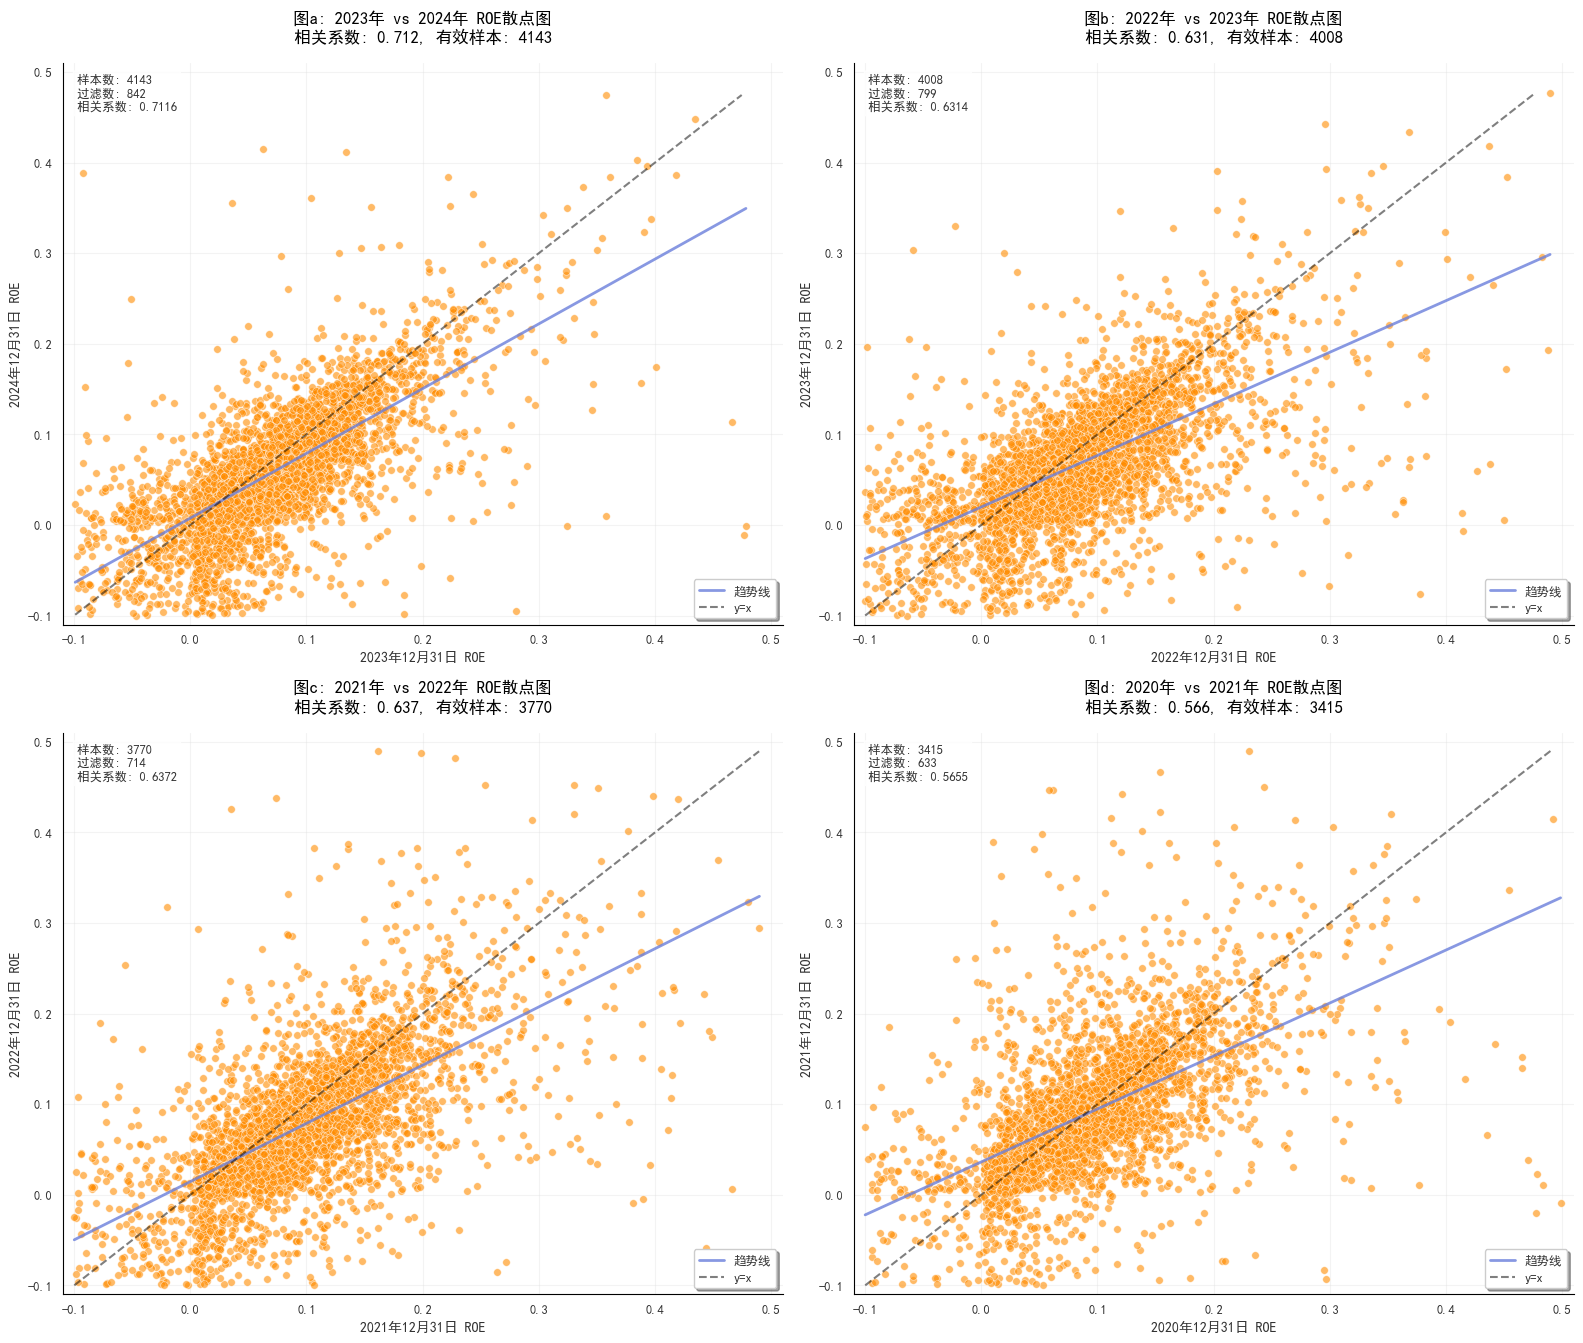

In [8]:
#ROE-ROE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import os  # 导入 os 模块来处理文件和文件夹

# 设置字体和风格
set_academic_style()
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

def prepare_roe_data_filtered(df, year1, year2, roe_min=-0.1, roe_max=0.5):
    """
    准备两年的ROE数据用于散点图，并筛选离群值
    """
    # 筛选第一年12月31日的数据
    date1 = f"{year1}-12-31"
    df_year1 = df[df['accper'] == date1].copy()

    # 筛选第二年12月31日的数据
    date2 = f"{year2}-12-31"
    df_year2 = df[df['accper'] == date2].copy()

    # 合并数据，基于股票代码
    merged_df = pd.merge(
        df_year1[['stkcd', 'ROEttm']],
        df_year2[['stkcd', 'ROEttm']],
        on='stkcd',
        suffixes=(f'_{year1}', f'_{year2}')
    )

    # 删除包含NaN的行
    merged_df = merged_df.dropna()
    initial_count = len(merged_df)

    # 筛选ROE范围
    condition = (
        (merged_df[f'ROEttm_{year1}'] >= roe_min) &
        (merged_df[f'ROEttm_{year1}'] <= roe_max) &
        (merged_df[f'ROEttm_{year2}'] >= roe_min) &
        (merged_df[f'ROEttm_{year2}'] <= roe_max)
    )

    filtered_df = merged_df[condition].copy()

    return filtered_df, initial_count - len(filtered_df)

def plot_roe_scatter_filtered(df, year1, year2, ax, title_suffix="", roe_min=-0.1, roe_max=0.5):
    """
    绘制筛选后的ROE散点图
    """
    # 准备数据
    data, filtered_count = prepare_roe_data_filtered(df, year1, year2, roe_min, roe_max)

    if len(data) == 0:
        ax.text(0.5, 0.5, f'无可用数据\n({year1}-{year2})',
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'图{title_suffix}: {year1}年 vs {year2}年 ROE散点图')
        return

    x = data[f'ROEttm_{year1}']
    y = data[f'ROEttm_{year2}']

    # 使用学术配色绘制散点图
    colors = get_academic_colors(1, 'categorical')
    ax.scatter(x, y, alpha=0.6, s=30, color=colors[0], edgecolors='white', linewidth=0.5)

    # 计算相关系数
    correlation = np.corrcoef(x, y)[0][1]

    # 添加趋势线
    trend_color = get_academic_colors(2, 'categorical')[1]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    x_trend = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_trend, p(x_trend), color=trend_color, linewidth=2, alpha=0.8, label='趋势线')

    # 添加y=x参考线
    min_val = max(x.min(), y.min(), roe_min)
    max_val = min(x.max(), y.max(), roe_max)
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, linewidth=1.5, label='y=x')

    # 设置标签和标题
    ax.set_xlabel(f'{year1}年12月31日 ROE', fontweight='bold')
    ax.set_ylabel(f'{year2}年12月31日 ROE', fontweight='bold')
    ax.set_title(f'图{title_suffix}: {year1}年 vs {year2}年 ROE散点图\n相关系数: {correlation:.3f}, 有效样本: {len(data)}',
                fontweight='bold', pad=15)

    # 设置坐标轴范围
    ax.set_xlim(roe_min - 0.01, roe_max + 0.01)
    ax.set_ylim(roe_min - 0.01, roe_max + 0.01)

    # 设置网格和图例
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)

    # 添加统计信息文本框
    stats_text = f'样本数: {len(data)}\n过滤数: {filtered_count}\n相关系数: {correlation:.4f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=9)

    print(f"{year1}-{year2}: 相关系数 = {correlation:.4f}, 有效样本 = {len(data)}, 过滤样本 = {filtered_count}")

# ---- 主执行代码部分 ----

# 设置ROE筛选范围
ROE_MIN = -0.1
ROE_MAX = 0.5

# ========================================================== #
# =================  添加的代码：创建文件夹  ================= #
# 定义保存图片的文件夹名称
save_dir = 'ch1pic'
# 检查文件夹是否存在，如果不存在则创建
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"文件夹 '{save_dir}' 已创建。")
# ========================================================== #

# 创建2x2的子图
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('',
             fontsize=18, fontweight='bold', y=0.95)

# 绘制四张图
plot_roe_scatter_filtered(dfpbroech1, 2023, 2024, axes[0][0], "a", ROE_MIN, ROE_MAX)
plot_roe_scatter_filtered(dfpbroech1, 2022, 2023, axes[0][1], "b", ROE_MIN, ROE_MAX)
plot_roe_scatter_filtered(dfpbroech1, 2021, 2022, axes[1][0], "c", ROE_MIN, ROE_MAX)
plot_roe_scatter_filtered(dfpbroech1, 2020, 2021, axes[1][1], "d", ROE_MIN, ROE_MAX)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# ========================================================== #
# =================  添加的代码：保存图片  =================== #
# 定义图片文件名和完整路径
filename = 'ROE年度相关性分析图.png'
filepath = os.path.join(save_dir, filename)

# 保存图片到指定路径，设置高分辨率和紧凑边界
plt.savefig(filepath, dpi=300, bbox_inches='tight')
print(f"图片已成功保存至: {filepath}")
# ========================================================== #

# 显示图片
plt.show()


PB-ROE 价值与质量双因子策略构建
1. 策略核心逻辑
本策略严格遵循“规则一”的指导思想，即高盈利能力（ROE）的公司理应享有更高的估值（P/B）。我们将这一理论付诸实践，旨在构建一个结合**“价值”与“质量”**双重维度的量化投资策略。
 * 质量维度： 通过筛选**高净资产收益率（ROE）**的公司，我们锁定那些资本运用效率高、具备强大盈利能力和潜在竞争优势的优质企业。
 * 价值维度： 通过筛选**低市净率（P/B）**的公司，我们寻找那些当前市场估值相对其净资产较为保守、可能被低估的投资标的。
将两者结合，策略的目标是识别并投资于那些**“又好又便宜”**的公司，从而兼顾投资的安全边际与长期收益潜力。
2. 策略具体构建规则
我们按照以下量化步骤来构建和执行该策略：
 * 调仓周期：
 * 每年进行一次调仓。
 * 调仓日： 固定为每年的5月1日。
 * 持有期： 从当年5月1日持有至次年4月30日。
  * 回测区间：**2010.5.1 – 2025.4.30**

 * 选股池构建： 在每个调仓日，我们对全市场股票进行如下筛选：
 1. 构建“高质量”组合：
 * 剔除ROE缺失的公司。
 * 在剩余股票中，按ROE从高到低排序，选取**排名前20%**的股票。
  *
 2. 构建“低估值”组合：
 * 剔除P/B小于0的公司。
 * 在剩余股票中，按上一年度末的P/B值从低到高排序，选取排名后20%（即估值最低的20%）的股票。
 * 最终投资组合：
 * 取上述“高质量组合”与“低估值组合”的交集，即同时满足高ROE和低P/B条件的股票，构成最终的投资组合。
 * 对入选的股票采用等权重方式进行资金分配。
 * 业绩基准与假设：
 * 比较基准： 沪深300指数。
 * 交易成本： 为简化模型，本次策略描述不考虑任何交易成本（如手续费、印花税等）。

In [5]:
# # PB‐ROE 输出每期组合股票代码
#
# 不计算收益率，仅导出每个调仓日期对应的股票代码列表，供回测引擎调用。

import pandas as pd
import numpy as np

# 假设 dfpbroech1 已经加载，并包含 ['stkcd','accper','ROEttm','PB', 'ifst']
# 从您的数据样本看，dfpbroech1 已经包含了 ifst 列
df = dfpbroech1.copy()

# 确保日期格式
df['accper'] = pd.to_datetime(df['accper'])


BACKTEST_START_DATE = '2010-05-01'
BACKTEST_END_DATE   = '2025-04-30'

# 因子分位数
ROE_TOP_Q   = 0.33   # ROE 排名前 20%
PB_BOTTOM_Q = 0.33   # PB 排名后 20%

# 每年 5 月 1 日为调仓日
rebalance_dates = pd.date_range(
    start=BACKTEST_START_DATE,
    end=BACKTEST_END_DATE,
    freq='AS-MAY'
)

# 2. 选股主循环

all_portfolios = []

for dt in rebalance_dates:
    year = dt.year - 1
    period_end = pd.Timestamp(f'{year}-12-31')
    # 取当年年报数据
    data = df[df['accper'] == period_end].copy()
    if data.empty:
        continue

    # ========================================================
    # == 新增修改：在此处剔除 ST 股票 ==
    # 根据 ifst 列进行筛选，保留非 ST 股 (ifst == 0)
    data = data[data['ifst'] == 0].copy()
    # ========================================================

    # 高 ROE
    # 高 ROE，限制不超过 40%
    # 高 ROE：先去空，再筛选，再排序
    quality = (
        data.dropna(subset=['ROEttm'])                        # Step 1: 去除空值
            .query('ROEttm <= 0.5')            # Step 2: 筛选 ROE 在 (0, 0.5]
            .sort_values(by='ROEttm', ascending=False)        # Step 3: 排序
    )

    n_r = int(len(quality) * ROE_TOP_Q)
    top_roe = quality.head(n_r)['stkcd']


    # 低 PB
    value = (
        data.dropna(subset=['PB'])
            .query('PB>0')
    )
    n_p = int(len(value) * PB_BOTTOM_Q)
    low_pb = value.nsmallest(n_p, 'PB')['stkcd']

    # 交集
    picks = sorted(set(top_roe) & set(low_pb))
    for stk in picks:
        all_portfolios.append({
            'rebalance_date': dt.strftime('%Y-%m-%d'),
            'stkcd': stk
        })

# 汇总为 DataFrame
portfolios_df = pd.DataFrame(all_portfolios)


# 3. 查看 & 导出
# 每期的持仓数量
print("每期持仓数量:")
print(portfolios_df
      .groupby('rebalance_date')
      .size()
      .rename('count')
      .reset_index())

# 导出为 CSV，供回测引擎使用
output_filename = 'pb_roe_ch1_no_st.csv'
portfolios_df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"\n已保存：{output_filename}")



每期持仓数量:
   rebalance_date  count
0      2010-05-01     92
1      2011-05-01    176
2      2012-05-01    167
3      2013-05-01    162
4      2014-05-01    206
5      2015-05-01    202
6      2016-05-01    230
7      2017-05-01    233
8      2018-05-01    210
9      2019-05-01    265
10     2020-05-01    260
11     2021-05-01    249
12     2022-05-01    302
13     2023-05-01    372
14     2024-05-01    480

已保存：pb_roe_ch1_no_st.csv


In [2]:
#PB-ROE 策略回测脚本 (重构优化版)
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
DATA_PATH = Path("E:/PBROE/data") # 【修改】您的数据主目录
STRATEGY_FILE = 'pb_roe_ch1_no_st.csv' # 策略选股文件，假设在主目录下
RETURNS_FILE = DATA_PATH / 'TRD_Mnth.csv' # 月度收益率文件
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv' # 基准指数文件

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)，设为 None 则从头开始
BACKTEST_END_DATE = '2025-04-30' # 回测结束日期 (YYYY-MM-DD)，设为 None 则到最后
BENCHMARK_CODE = '000300' # 【修改】业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300' # 基准名称，用于报告
RISK_FREE_RATE = 0.03 # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(strategy_path, returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理所有需要的数据文件。
    """
    print("--- 步骤 1: 加载并预处理数据 ---")
    try:
        # 加载策略、收益和基准数据
        strategy_df = pd.read_csv(strategy_path)
        returns_df = pd.read_csv(returns_path)
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("所有数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。请检查【配置区域】中的文件路径。")
        return None, None, None

    # --- 预处理策略文件 ---
    strategy_df['rebalance_date'] = pd.to_datetime(strategy_df['rebalance_date'])
    strategy_df['stkcd'] = strategy_df['stkcd'].astype(str).str.zfill(6)

    # --- 预处理股票收益文件 ---
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')

    # --- 预处理基准文件 (核心修正部分) ---
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()

    if benchmark_df.empty:
        print(f"错误: 在基准文件 {benchmark_path.name} 中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None, None
    print(f"已成功筛选出基准 '{BENCHMARK_NAME}' ({benchmark_code}) 的数据，共 {len(benchmark_df)} 条。")

    # 将月份字符串转为日期对象，并创建用于合并的key
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)

    # 只保留合并需要的列
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return strategy_df, returns_df, benchmark_df

# =================================================================== #
#                       【3. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    """
    执行回测循环，计算投资组合的月度收益率。
    """
    print("--- 步骤 2: 执行回测 ---")

    # 根据全局设定的日期过滤调仓数据
    if start_date_str:
        start_date = pd.to_datetime(start_date_str)
        strategy_df = strategy_df[strategy_df['rebalance_date'] >= start_date]
        print(f"回测起始日期已设置为: {start_date.strftime('%Y-%m-%d')}")
    if end_date_str:
        end_date = pd.to_datetime(end_date_str)
        strategy_df = strategy_df[strategy_df['rebalance_date'] <= end_date]
        print(f"回测结束日期已设置为: {end_date.strftime('%Y-%m-%d')}")

    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()

    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"筛选后的调仓日期数量: {len(rebalance_dates)}")

    monthly_returns_list = []

    for i, current_rebalance_date in enumerate(rebalance_dates):
        # 确定本期持仓的结束日期
        if i + 1 < len(rebalance_dates):
            next_rebalance_date = rebalance_dates[i + 1]
        else:
            # 如果是最后一个调仓期，则持有到数据末尾
            next_rebalance_date = returns_df['Trdmnt'].max() + pd.DateOffset(months=1)

        # 选出当前持仓的股票
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == current_rebalance_date]['stkcd'].tolist()

        # 获取本持仓期内所有月份
        period_months = sorted(returns_df[
            (returns_df['Trdmnt'] >= current_rebalance_date) &
            (returns_df['Trdmnt'] < next_rebalance_date)
        ]['Trdmnt'].unique())

        # 计算每个月的组合收益率
        for month_end_date in period_months:
            # 筛选出当月、在持仓列表中的股票收益数据
            month_returns_data = returns_df[
                (returns_df['Trdmnt'] == month_end_date) &
                (returns_df['Stkcd'].isin(current_portfolio))
            ]
            valid_returns = month_returns_data.dropna(subset=['Mretwd'])

            if not valid_returns.empty:
                portfolio_return = valid_returns['Mretwd'].mean()
                monthly_returns_list.append({
                    'date': month_end_date,
                    'portfolio_return': portfolio_return,
                    'valid_stocks': len(valid_returns),
                    'total_stocks': len(current_portfolio)
                })

    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()

    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print("回测循环完成，已生成投资组合月度收益率。\n")
    return portfolio_returns_df

def merge_with_benchmark(portfolio_returns_df, benchmark_df):
    """
    将投资组合收益与基准收益合并。
    """
    print("--- 步骤 3: 合并策略与基准收益 ---")
    if portfolio_returns_df.empty or benchmark_df.empty:
        print("错误：投资组合或基准收益数据为空，无法合并。")
        return pd.DataFrame()

    # 创建用于合并的key
    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')

    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')

    # 检查合并效果
    nan_benchmarks = merged_df['benchmark_return'].isnull().sum()
    if nan_benchmarks > 0:
        print(f"警告: 有 {nan_benchmarks} 个月份未能匹配到基准收益率，将以 0.0 填充。")
        print("请检查基准数据文件是否覆盖了全部回测时段。")
        merged_df['benchmark_return'].fillna(0.0, inplace=True)

    merged_df.drop(columns=['merge_key'], inplace=True)
    print("数据合并完成。\n")
    return merged_df

# =================================================================== #
#                       【4. 绩效评估与保存模块】                      #
# =================================================================== #

def calculate_performance_metrics(returns_df, benchmark_name):
    """
    根据合并后的收益数据计算各项绩效指标。
    """
    print("--- 步骤 4: 计算绩效指标 ---")

    total_months = len(returns_df)
    if total_months == 0:
        print("无有效数据，无法计算绩效。")
        return {}

    # --- 准备数据 ---
    returns_df['cumulative_return'] = (1 + returns_df['portfolio_return']).cumprod()
    returns_df['excess_return'] = returns_df['portfolio_return'] - returns_df['benchmark_return']

    # --- 计算绝对表现指标 ---
    final_cumulative_return = returns_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = returns_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0

    # 计算最大回撤
    rolling_max = returns_df['cumulative_return'].expanding().max()
    drawdown = (returns_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    win_rate = (returns_df['portfolio_return'] > 0).mean()

    # --- 计算相对表现指标 ---
    annualized_benchmark_return = (1 + returns_df['benchmark_return']).prod() ** (12 / total_months) - 1
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = returns_df['excess_return'].std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0
    win_rate_vs_benchmark = (returns_df['excess_return'] > 0).mean()

    # --- 整理并打印绩效指标 ---
    metrics = {
        'total_months': total_months,
        'cumulative_return': final_cumulative_return - 1,
        'annualized_return': annualized_return,
        'annualized_volatility': annualized_volatility,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'annualized_benchmark_return': annualized_benchmark_return,
        'annualized_excess_return': annualized_excess_return,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'win_rate_vs_benchmark': win_rate_vs_benchmark
    }

    print("\n" + "="*22 + " PB-ROE策略绩效报告 " + "="*22)
    print(f"回测时段: {returns_df['date'].min().strftime('%Y-%m')} 至 {returns_df['date'].max().strftime('%Y-%m')}")
    print(f"总月数: {total_months}")
    print("\n--- 绝对表现 ---")
    print(f"累计收益率: {metrics['cumulative_return']:.2%}")
    print(f"年化收益率: {metrics['annualized_return']:.2%}")
    print(f"年化波动率: {metrics['annualized_volatility']:.2%}")
    print(f"夏普比率 (无风险利率={RISK_FREE_RATE:.0%}): {metrics['sharpe_ratio']:.4f}")
    print(f"最大回撤: {metrics['max_drawdown']:.2%}")
    print(f"月度胜率: {metrics['win_rate']:.2%}")

    print(f"\n--- 相对表现 (基准: {benchmark_name}) ---")
    print(f"基准年化收益率: {metrics['annualized_benchmark_return']:.2%}")
    print(f"年化超额收益率: {metrics['annualized_excess_return']:.2%}")
    print(f"跟踪误差: {metrics['tracking_error']:.2%}")
    print(f"信息比率: {metrics['information_ratio']:.4f}")
    win_vs_bench_count = (returns_df['excess_return'] > 0).sum()
    print(f"对基准月度胜率: {metrics['win_rate_vs_benchmark']:.2%} (在 {total_months} 月中战胜基准 {win_vs_bench_count} 次)")
    print("="*68 + "\n")

    return metrics

def save_results(returns_df, metrics):
    """
    将月度收益详情和绩效指标保存到CSV文件。
    """
    print("--- 步骤 5: 保存结果 ---")

    # 准备月度数据用于保存
    output_df = returns_df.copy()
    output_df['战胜基准'] = np.where(output_df['excess_return'] > 0, '是', '否')
    output_df['date'] = output_df['date'].dt.strftime('%Y-%m')
    output_df['cumulative_return'] = output_df['cumulative_return'] - 1 # 转为收益率

    output_df = output_df.rename(columns={
        'date': '月份',
        'portfolio_return': '组合月收益率',
        'benchmark_return': '基准月收益率',
        'excess_return': '超额收益率',
        'cumulative_return': '组合累计收益率',
        'valid_stocks': '有效股票数',
        'total_stocks': '总股票数'
    })

    final_columns = [
        '月份', '组合月收益率', '基准月收益率', '超额收益率', '战胜基准',
        '组合累计收益率', '有效股票数', '总股票数'
    ]
    output_df = output_df[final_columns]

    # 保存月度收益文件
    returns_filename = 'strategy_monthly_returns_vs_benchmark.csv'
    output_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"月度收益率及基准对比已保存至: {returns_filename}")

    # 保存绩效指标文件
    metrics_df = pd.DataFrame([metrics])
    metrics_filename = 'strategy_performance_metrics.csv'
    metrics_df.to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}")

    return output_df

# =================================================================== #
#                          【5. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        # 1. 加载和预处理数据
        strategy_df, returns_df, benchmark_df = load_and_preprocess_data(
            STRATEGY_FILE, RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if strategy_df is None: return

        # 2. 运行回测
        portfolio_returns_df = run_backtest(
            strategy_df, returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return

        # 3. 合并基准
        merged_df = merge_with_benchmark(portfolio_returns_df, benchmark_df)
        if merged_df.empty: return

        # 4. 计算绩效
        metrics = calculate_performance_metrics(merged_df, BENCHMARK_NAME)
        if not metrics: return

        # 5. 保存结果
        output_df = save_results(merged_df, metrics)

        print("\n回测完成！")
        print("前10个月的收益率及基准对比数据:")
        print(output_df.head(10).to_string(index=False))

    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

--- 步骤 1: 加载并预处理数据 ---
所有数据文件加载成功。
已成功筛选出基准 '沪深300' (000300) 的数据，共 246 条。
数据预处理完成。

--- 步骤 2: 执行回测 ---
回测起始日期已设置为: 2010-05-01
回测结束日期已设置为: 2025-04-30
筛选后的调仓日期数量: 15
回测循环完成，已生成投资组合月度收益率。

--- 步骤 3: 合并策略与基准收益 ---
数据合并完成。

--- 步骤 4: 计算绩效指标 ---

====================== PB-ROE策略绩效报告 ======================
回测时段: 2010-05 至 2025-05
总月数: 181

--- 绝对表现 ---
累计收益率: 200.08%
年化收益率: 7.56%
年化波动率: 23.71%
夏普比率 (无风险利率=3%): 0.1922
最大回撤: -39.43%
月度胜率: 54.14%

--- 相对表现 (基准: 沪深300) ---
基准年化收益率: 1.50%
年化超额收益率: 6.06%
跟踪误差: 10.62%
信息比率: 0.5700
对基准月度胜率: 57.46% (在 181 月中战胜基准 104 次)

--- 步骤 5: 保存结果 ---
月度收益率及基准对比已保存至: strategy_monthly_returns_vs_benchmark.csv
绩效指标已保存至: strategy_performance_metrics.csv

回测完成！
前10个月的收益率及基准对比数据:
     月份    组合月收益率    基准月收益率     超额收益率 战胜基准   组合累计收益率  有效股票数  总股票数
2010-05 -0.108558 -0.095883 -0.012675    否 -0.108558     91    92
2010-06 -0.071217 -0.075792  0.004575    是 -0.172044     91    92
2010-07  0.169431  0.119302  0.050129    是 -0.031762     91    92
2010-08  0.027819  0.011970  0.